# PyTorch入门和神经网络实现
Author: Wei Jiangnan 2024.9

--------------------------------------------------------------------------------------------------------------------------
#### 本作业中，我们将学习基本的PyTorch使用，并实现一个全连接神经网络，用于在 MNIST 数据集上实现手写数字分类。
**`[建议]`** PyTorch学习资料：
+ [动手学深度学习](https://zh-v2.d2l.ai/index.html)中的`预备知识`部分和`Softmax回归`部分
+ [动手学深度学习b站视频](https://space.bilibili.com/1567748478/channel/seriesdetail?sid=358497)
+ [PyTorch官网教程](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
+ [PyTorch官方文档](https://pytorch.org/docs/stable/index.html)
--------------------------------------------------------------------------------------------------------------------------


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

### 1 Pytorch入门和反向传播 (40)
Pytorch是当下最流行的深度学习框架之一，它的设计理念是将numpy的灵活性和GPU的高性能相结合，使得用户可以像使用numpy一样使用GPU加速。Pytorch的核心是张量(Tensor)，它是一个类似于numpy的多维数组，但是可以在GPU上加速运算。Pytorch的另一个核心是自动求导机制，它可以自动计算任意Tensor的梯度，使得用户可以方便地使用反向传播算法训练神经网络。总得来说，PyTorch的语法和numpy非常相似，仅有微小的差别。

#### 1-1 (2) 

将torch的随机种子设定为123，创建一个符合默认正态分布$\mathcal{N}(0,1)$的张量 `a` ，形状为 [3,20,20]。

In [ ]:
torch.manual_seed(123)
# numpy.random.seed(123)
a = torch.randn(3, 20, 20)
a0 = torch.normal(0, 1, size = (3, 20, 20))
print(a)
print(a0)

tensor([[[ 0.3374, -0.1778, -0.3035,  ..., -1.0205, -0.1690,  0.9178],
         [ 1.5810,  1.3010,  1.2753,  ..., -0.9343, -0.4991, -1.0867],
         [ 0.8805,  1.5542,  0.6266,  ..., -0.8036, -0.2808,  0.7697],
         ...,
         [ 0.9376, -0.9225,  0.7047,  ...,  1.7409,  0.2698,  0.9595],
         [-1.0253, -0.5505,  1.0264,  ..., -0.2866,  0.4343, -0.1340],
         [-2.1467, -1.7984, -0.6822,  ..., -1.4498,  1.5446,  1.0394]],

        [[ 2.1681,  0.4884,  0.3359,  ...,  1.3258,  0.2103,  1.7876],
         [-1.2128,  0.2045,  1.1051,  ...,  0.7392, -0.4931,  0.4073],
         [-1.0394, -0.3226,  0.7226,  ..., -0.3845,  0.6554, -0.1045],
         ...,
         [ 0.9202,  0.1743, -0.4796,  ...,  1.0720,  1.1054, -2.0586],
         [ 0.2878, -1.1389,  0.1729,  ..., -0.7809, -0.2270, -0.4358],
         [ 0.8209, -0.6353, -0.4386,  ..., -0.4097, -0.0627,  0.0175]],

        [[ 1.3715, -0.2226,  1.0566,  ..., -1.6292,  0.6107,  1.2718],
         [-0.9422, -0.2667, -0.3216,  ...,  0

#### 1-2 对a进行操作： 
1. 将 `a` 转化为numpy的array，并输出 `a[0,0]`。（2）
2. 将 `a` 转化回tensor，并输出 `a[0,0]`。（2）

**除了这个单元格，在之后不再会使用Numpy库**



In [6]:
a = a.numpy()
print(a[0,0])
a = torch.from_numpy(a)
print(a[0,0])

[ 0.3373702  -0.17777722 -0.3035276  -0.58801186  0.3486052   0.66034096
 -0.21963762 -0.37916982  0.76710707 -1.192502    0.6983519  -1.4097229
  0.17937961  1.895148    0.49544638  0.26919857 -0.07702024 -1.0204719
 -0.16895628  0.91776454]
tensor([ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
         0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692,
        -0.0770, -1.0205, -0.1690,  0.9178])


#### 1-3 对于 `a` ，输出：（2\*4=8）
1. `a` 的形状。
2. `a` 的均值。
3. `a` 的标准差。
4. `a` 的中位数

In [9]:
print(a.shape)
print(a.mean())
print(a.std())
print(a.median())

torch.Size([3, 20, 20])
tensor(-0.0028)
tensor(0.9965)
tensor(-0.0016)


#### 1-4 计算: 
- `b2` = `a` 第二维度上的均值。（2）
- `b12`= `a` 第一维度和第二维度上的均值。（2）
- 输出`b2` 和 `b12`的形状。（1）

In [ ]:
b2 = a.mean(dim = 1)
b12 = a.mean(dim = (0, 1))
print(b2.shape)
print(b12.shape)

#### 1-5 设置随机种子为123，创建一个具有3层的模型`model_tmp`:（5）

- layer 1 ---------- : 输入长度为400，输出长度为128，带有偏置。

- activation 1 ----- : relu

- layer 2 ---------- : 输入长度为128，输出长度为64，有偏置。

- activation 2 ----- : relu

- layer 3 ---------- : 输入长度为64，输出长度为4，无偏置。

- activation 3 ----- : 对-1列进行softmax

***注意：*** 请使用`torch.nn`中的函数来创建模型，不要自己写网络层。



In [10]:
# 创建一个类，继承于nn.Module
torch.manual_seed(123)
# nn.Module是PyTorch中所有模型的基类
class ModelTmp(nn.Module):
    # 模型的初始化
    def __init__(self):
        # super(ModelTmp, self)表示调用父类的构造函数
        super(ModelTmp, self).__init__()
        self.layer1 = nn.Linear(400, 128, bias = True)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 64, bias = True)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 4, bias = False)
        self.activation3 = nn.Softmax(dim=-1)
    # 模型的训练函数
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.activation2(x)
        x = self.layer3(x)
        x = self.activation3(x)
        return x
model_tmp = ModelTmp()

#### 1-6  将`a`的后两维展开，将`model_tmp` 作用于 `a`。输出 model_tmp(a)的结果。（2）

`[验证]`: 你的输出应该为 $$[[0.2528, 0.2571, 0.2370, 0.2530],\\
        [0.2508, 0.2230, 0.2388, 0.2874],\\
        [0.2643, 0.2372, 0.2225, 0.2761]]$$

In [20]:
# a.view()用于重新调整tensor的形状
arr = a.view(3, 400)
# 或者arr = a.view(3, -1) # -1表示自动计算
output = model_tmp.forward(arr)
print(model_tmp.forward(arr))

tensor([[0.2528, 0.2571, 0.2370, 0.2530],
        [0.2508, 0.2230, 0.2388, 0.2874],
        [0.2643, 0.2372, 0.2225, 0.2761]], grad_fn=<SoftmaxBackward0>)


#### 1-7 计算`model(a)` 和一个 `all-1 tensor`之间的MSE损失。（3）

`[验证]`: 你的输出应该为 0.5629。

`[提示]`: 你可以使用 **torch.nn.functional** 或者 **torch.nn** 或者 **torch**。


In [21]:
all_ones = torch.ones_like(output)
loss_fun = nn.MSELoss() # 定义损失函数
loss = loss_fun(output, all_ones) # 计算损失
print(loss)

tensor(0.5629, grad_fn=<MseLossBackward0>)


#### 1-8 对于得到的loss执行 `反向传播`，并获取model_tmp的最后一层的梯度，命名为`grd`。 输出 `grd[:,5]`。（4）

`[验证]`: 你应该输出 $$[ 7.4889 e^{-5}, -2.6256e^{-5}, -3.4365e^{-4},  2.9502 e^{-4}]$$

`[提示]`: 你可以采用 w_last_layer = list(model.parameters())[-1] 来获取权重，或采用其他更优雅的方法。

In [22]:
loss.backward() # 反向传播, 计算梯度，torch会自动计算梯度
grad = list(model_tmp.parameters())[-1].grad # 获取梯度，获取所有参数，转换为list，然后取出最后一层的参数，然后取出梯度
print(grad[:,5])

tensor([ 7.4887e-05, -2.6258e-05, -3.4365e-04,  2.9502e-04])


#### 1-9 验证反向传播的正确性：
1. 创建一个 `SGD 优化器` ，学习率为 `1e-3`，应用于model_tmp的参数。 （2）
2. 使用优化器对model_tmp进行一次优化。（2）
3. 验证模型`优化前后参数的差` 等于 `1e-3 * grd`，有可能有一点点误差，这是由于浮点数精度造成的。（3）

`[提示]`: 你可以输出一些值，从而我们可以看到输出的值接近于0或者接近于1e-3。

In [31]:
optimizer = optim.SGD(model_tmp.parameters(), lr=1e-3)
optimizer.step() # 更新参数
new_grad = list(model_tmp.parameters())[-1].grad
print((grad - new_grad).abs().mean().item()) # 梯度更新后，梯度发生了变化

0.0


### 2. 全连接神经网络 (MLP) (40)

**`任务`**: 
1. 创建一个全连接神经网络，接受一个拉直后的图像([28,28] -> [28*28])的输入。(6)
2. 选择优化器和损失函数。(4)
3. 在MNIST训练集上训练若干个epoch，可选为10个epoch。(6)
4. 根据验证集的表现，选择最好的模型。(5)
5. `将你的最好的模型保存`。(4)

**`需要的输出`**: 
1. 在每个epoch结束后，输出训练集和验证集的loss。(5)
2. 训练结束后，在一张图上绘制训练集和验证集的loss曲线。(5)
3. 在测试集上测试你的模型，输出测试集的loss和准确率。(5)


 `只有在测试集的准确率大于90.00%的情况下，才能得到分数。通常只要网络实现正确，就能达到这个要求。`



In [4]:
#### 准备数据集
#### 你的环境中应该有torchvision或pickle

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import importlib

# python > 3.4
if importlib.util.find_spec('torchvision') is None: # 没有torchvision，使用pickle读取下载好的MNIST数据集
    import pickle as pkl

    with open('./MNIST_dataset_local','rb') as read_file:
        data = pkl.load(read_file)
        read_file.close()

    train_images, train_labels = data['train']
    test_images, test_labels = data['test']

    val_images, val_labels = train_images[5500:], train_labels[5500:]
    train_images, train_labels = train_images[:5500], train_labels[:5500]

    class myMnistDataSet(Dataset):

        def __init__(self,images,labels):
            self.X = images[:,None,...]
            self.y = labels

        def __len__(self):
            return len(self.X)

        def __getitem__(self, index):
            image = self.X[index]
            label = self.y[index]
            return torch.Tensor(image), torch.tensor(label)[0]
        
    mnist_train = myMnistDataSet(train_images, train_labels.astype('int64'))
    mnist_test = myMnistDataSet(test_images, test_labels.astype('int64'))
    mnist_val = myMnistDataSet(val_images, val_labels.astype('int64'))

else: # use torchvision
    from torchvision import transforms, datasets

    mnist_download_path = './MNIST_dataset'
    datasets.MNIST(root=mnist_download_path, download=True)

    mnist_train = datasets.MNIST(root = mnist_download_path, train = True, transform=transforms.ToTensor())
    mnist_val   = Subset(mnist_train, list(range(5500,6000)))
    mnist_train = Subset(mnist_train, list(range(5500)))

    mnist_test  = datasets.MNIST(root = mnist_download_path, train = False, transform=transforms.ToTensor())


def get_loaders(batch_size):
    train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
    val_loader   = DataLoader(mnist_val, batch_size = batch_size, shuffle=False)
    test_loader  = DataLoader(mnist_test, batch_size = batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# 查看dataloader
batch_size = 32
train_loader, val_loader, test_loader = get_loaders(batch_size)

## 对每个batch进行迭代，在后续的训练中，每次迭代都会返回一个batch的数据
for im, l in val_loader:
    break

print(im.shape, l.shape)
print(l)

torch.Size([32, 1, 28, 28]) torch.Size([32])
tensor([1, 9, 0, 9, 7, 0, 5, 1, 2, 2, 3, 3, 0, 4, 0, 5, 1, 6, 9, 7, 1, 8, 9, 9,
        6, 0, 5, 1, 2, 2, 1, 3])


In [5]:
len(mnist_train)

5500

#### 2-1 Train NN

In [21]:
torch.manual_seed(128)
# 创建一个全连神经网络模型（也创建一个三层的好了）
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # 图像输入是一个28*28的tensor，我们将其展平为一个784的向量
        # 最后都是需要将28*28的图像转换为10个类别，不管是多少层，最后都是要转换为10个类别
        self.layer1 = nn.Linear(28*28, 128, bias = True)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 64, bias = True)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 10, bias = False)
        # self.activation3 = nn.Softmax(dim=-1)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.activation2(x)
        x = self.layer3(x)
        # x = self.activation3(x)
        return x

model = MLP()

# 定义损失函数和优化器
loss_MLP = nn.CrossEntropyLoss() # 交叉熵损失
optimizer_MLP = optim.Adam(model.parameters(), lr = 1e-3)

# 训练模型
def train(model, loss_fun, optimizer, train_loader, val_loader, epochs = 10):
    train_loss, val_loss = [], [] # 记录训练集和验证集的损失
    for epoch in range(epochs):
        model.train()# 这里的意思是模式调用
        sum_loss = 0.0
        for images, labels in train_loader:# label也就是要预测的真实值，图像是输入数据
            optimizer.zero_grad()
            output = model.forward(images)# 前向传播，预测图象值，分类结果？
            loss = loss_fun(output, labels)# 计算损失
            # 更新参数
            loss.backward()
            optimizer.step()# 优化
            sum_loss += loss.item()
        avg_loss = sum_loss / len(train_loader)
        train_loss.append(avg_loss)

        # 同理，在测试集上记录损失
        model.eval()# model.eval()评估模式，不启用 BatchNormalization 和 Dropout
        sum_val_loss = 0.0
        with torch.no_grad():# 不需要计算梯度
            for images, labels in val_loader:
                val_output = model.forward(images)
                val_loss_value = loss_fun(val_output, labels)
                sum_val_loss += val_loss_value.item()
        avg_val_loss = sum_val_loss / len(val_loader)
        val_loss.append(avg_val_loss)

        print(f'{epoch + 1}/{epochs}: 训练损失：{avg_loss}, 验证损失：{avg_val_loss}')
    return train_loss, val_loss

train_loss, val_loss = train(model, loss_MLP, optimizer_MLP, train_loader, val_loader, epochs=10)

1/10: 训练损失：0.8569877305782811, 验证损失：0.424207719473306
2/10: 训练损失：0.2526225132412862, 验证损失：0.39549863741
3/10: 训练损失：0.19156180312965326, 验证损失：0.4114523416319742
4/10: 训练损失：0.13547963200970878, 验证损失：0.40082642909601846
5/10: 训练损失：0.1380190981205466, 验证损失：0.4230236614461524
6/10: 训练损失：0.1021662273344064, 验证损失：0.4034519384032658
7/10: 训练损失：0.07625431768847615, 验证损失：0.38196003509496085
8/10: 训练损失：0.05189172291977948, 验证损失：0.45821524555855697
9/10: 训练损失：0.07458035170701657, 验证损失：0.47961491626174774
10/10: 训练损失：0.04844412622341499, 验证损失：0.42081047078971884


#### 2-2 Plot loss

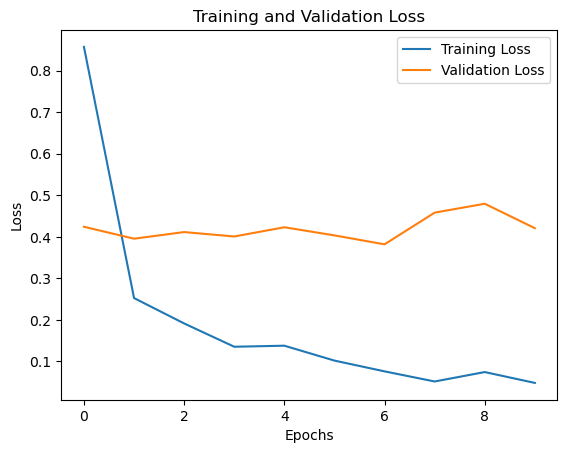

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

#### 2-3 Test NN

In [23]:
# 测试模型和上面基本一样，如何用test数据计算准确性
def test(model, loss_fun, test_loader):
    # 模型模式
    model.eval()
    test_loss = 0

    correct = 0 # 记录正确的样本数
    total = 0 # 记录总的样本数

    with torch.no_grad():
        for images, labels in test_loader:
            output = model.forward(images)
            test_loss += loss_fun(output, labels).item()

            # 计算准确性
            _, predicted = torch.max(output, 1)# 返回每一行最大值的索引，相当于是判断出是哪个类别后的索引
            total += labels.size(0) # 意思是这测试集有多少个样本
            correct += (predicted == labels).sum().item() # 预测正确的样本数
    
    accuracy = 100 * correct / total
    avg_test_loss = test_loss / len(test_loader)

    print(f'测试集误差：{avg_test_loss}，准确性：{accuracy:.4f}%')
    return avg_test_loss, accuracy

test_loss, accuracy = test(model, loss_MLP, test_loader)

if accuracy > 90:
    print('模型测试通过')
    torch.save(model.state_dict(), './best_model.pth')
    # model.load_state_dict(torch.load('./best_model.pth'))# 加载模型
else:
    print('模型测试未通过')

测试集误差：0.3788143013218894，准确性：92.3100%
模型测试通过


### 测试集准确性评价常用方法

1. `_, predicted = torch.max(outputs, 1)`：
   - `outputs` 是模型的输出张量，包含每个样本属于每个类别的预测分数。假设你的模型输出的是一个二维张量，形状为 `[batch_size, num_classes]`，其中每行代表一个样本，每列是该样本属于对应类别的分数。
   - `torch.max(outputs, 1)` 返回每行（即每个样本）分数最大的值及其索引，其中 `1` 指定了在类别维度上（第2个维度）取最大值。
   - `predicted` 会保存最大值的索引，即模型预测的类别标签。

2. `total += labels.size(0)`：
   - `labels` 是实际标签。`labels.size(0)` 获取了当前批次中的样本数量。
   - `total` 是样本总数，用于后续计算准确率。

3. `correct += (predicted == labels).sum().item()`：
   - `(predicted == labels)` 创建一个布尔张量，每个元素表示预测是否与实际标签匹配。
   - `.sum()` 计算该张量中 `True`（即预测正确）的数量。
   - `.item()` 将结果转换为 Python 标量，以便累加到 `correct` 中。

通过这段代码，每个批次累加得到 `correct`（预测正确的样本数）和 `total`（样本总数）。最终，准确率可以通过 `accuracy = correct / total` 计算得出。

### 3 神经网络的可视化（20）

3-1. 展示在验证集上，每个label对应的的平均图像。(6)

3-2. 训练一个`一层`的神经网络用于分类，这个网络只有两组参数($\boldsymbol{w}$和$\boldsymbol{b}$)。(4)

3-3 对于数字0-9，将它们训练`前后`对应的$\boldsymbol{w}$分别可视化。(7)

3-3. 使用`一个词`总结这个`单层网络`的机制。(3)

[提示]:  
 - 权重$\boldsymbol{w}$的形状为 [10, 28*28]。将其reshape至[10, 28, 28]，然后plot共10次[28, 28]。

在这里，"数字 0-9" 是指 MNIST 数据集中每个类别的数字标签。从 0 到 9 的标签代表不同的手写数字。你需要在训练神经网络前和训练后分别可视化这些数字类别的权重，以观察权重的变化。

具体来说：

1. **创建一个单层神经网络**：
   - 这个网络只有输入层和输出层，将图像的像素展平作为输入，输出一个大小为 10 的向量，每个输出节点对应一个数字（0 到 9）。
   
2. **可视化每个类别的权重**：
   - 在训练之前，提取网络的权重 \(\boldsymbol{w}\)，将其从形状 `[10, 784]` 变为 `[10, 28, 28]`（784 是 28×28 展平后的大小），以便将每个数字的权重显示为 28x28 图像。
   - 训练后，再次提取权重并以同样的方式可视化，从而可以对比训练前后的变化。

+ 也就是说，MNIST数据集是一个手写字的数据集，有10个类别，我的单层网络的权重是10*28*28个

#### 3-1 平均图像

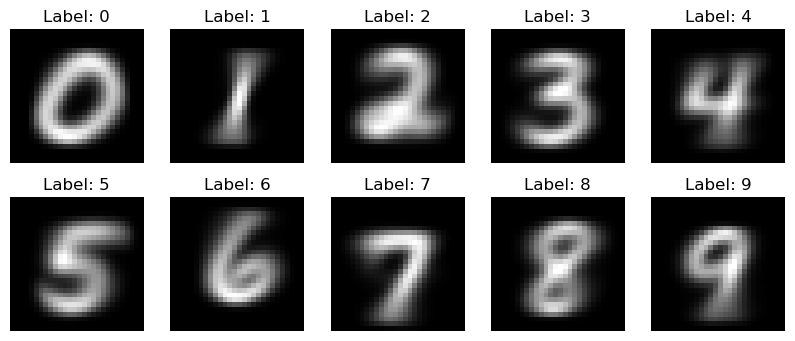

In [24]:
# 存储每个标签的图像集合
label_images = {}
for i in range(10):
    label_images[i] = []

for images, labels in val_loader:
    for image, label in zip(images, labels): #zip打包，一一对应
        label_images[label.item()].append(image)

# 计算平均图像并展示
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    # 计算平均图像
    avg_image = torch.stack(label_images[i]).mean(dim=0).squeeze()
    # 展示平均图像
    ax = axes[i // 5, i % 5]
    ax.imshow(avg_image, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {i}')
plt.show()

##### 3-2 训练前的权重

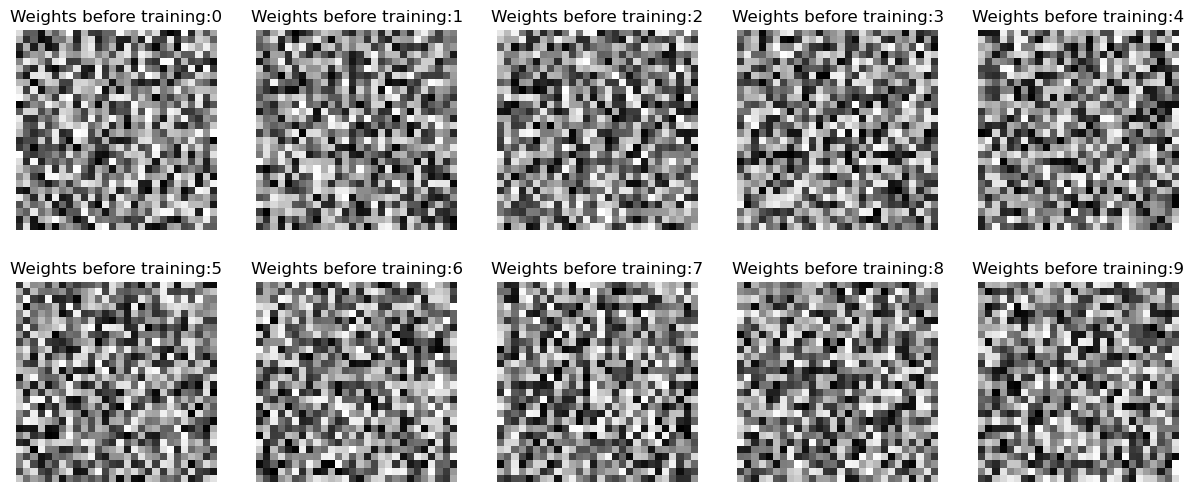

In [29]:
torch.manual_seed(128)
# 创建一个单层网络
class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        # 仅一层线性层 [784 -> 10]
        self.linear = nn.Linear(28 * 28, 10, bias=True)
        # 最后都是需要将28*28的图像转换为10个类别，不管是多少层，最后都是要转换为10个类别

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 展平输入图像
        x= self.linear(x)
        # x = nn.functional.relu(x)
        return x

# 创建模型实例
single_layer_model = SingleLayerNN()
# 定义损失函数和优化器
loss_single_layer = nn.CrossEntropyLoss() # 交叉熵损失
optimizer_single_layer = optim.Adam(single_layer_model.parameters(), lr = 1e-2)

def weight_visualization(model, title = 'Weights'):
    # 获取模型的参数
    with torch.no_grad():
        weights = model.linear.weight.data.view(10, 28, 28)
        fig, axes =plt.subplots(2, 5, figsize = (15, 6))
        for i in range(10):
            ax = axes[i//5, i%5]
            ax.imshow(weights[i].numpy(), cmap = 'gray') # 也就是说把weight的值画出来
            ax.axis('off')
            ax.set_title(f'{title}:{i}')
    plt.show()

weight_visualization(single_layer_model, title="Weights before training")


##### 3-3 训练后的权重

1/10: 训练损失：39.354349703203106, 验证损失：39.3625273811924
2/10: 训练损失：30.249911584133326, 验证损失：40.81083546636351
3/10: 训练损失：24.64461588097173, 验证损失：41.94584537180181
4/10: 训练损失：27.04547396030407, 验证损失：47.47834463198871
5/10: 训练损失：22.12506703711873, 验证损失：42.52188060672425
6/10: 训练损失：21.667662187445924, 验证损失：51.57817532476983
7/10: 训练损失：24.120666165683286, 验证损失：56.76309686689408
8/10: 训练损失：18.648439480108205, 验证损失：54.29244344881304
9/10: 训练损失：18.826082214024925, 验证损失：58.02231691921859
10/10: 训练损失：18.318767116592458, 验证损失：56.564394378882064
测试集误差：52.512010625292795，准确性：88.1900%


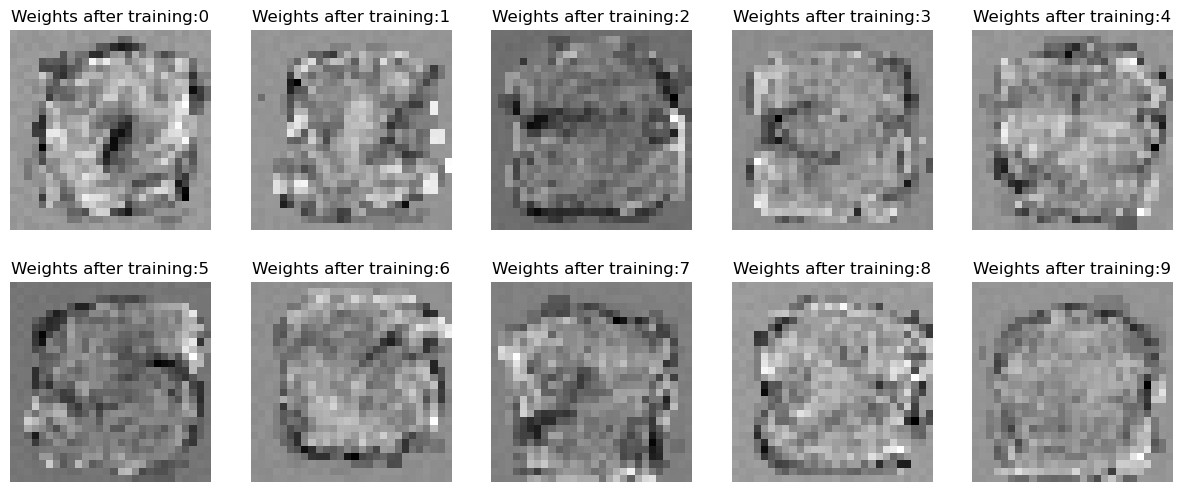

In [30]:
train(single_layer_model, loss_single_layer, optimizer_single_layer, train_loader, val_loader, epochs = 10)
test(single_layer_model, loss_single_layer, test_loader)
weight_visualization(single_layer_model, title="Weights after training")

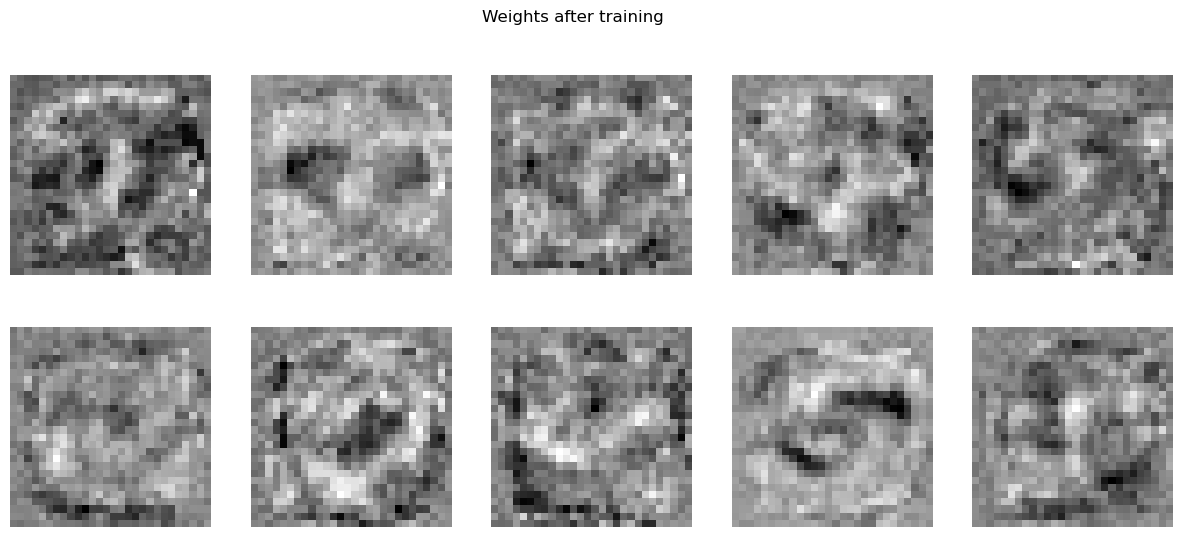

In [67]:
def weight_visualization_three(model, title='Weights'):
    # 获取模型的参数
    with torch.no_grad():
        weights = model.layer1.weight.data.view(128,28,28)  # 展示 `layer1` 的权重，形状为 (128, 28, 28)
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        
        # 只显示前10个权重
        for i in range(10):
            ax = axes[i // 5, i % 5]
            ax.imshow(weights[i].cpu(), cmap='gray')
            ax.axis('off')
        
        fig.suptitle(title)
        plt.show()
weight_visualization_three(model, title="Weights after training")

#### 3-4 **一个词**: 

+ 特征提取
+ 分类
+ ...